In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [3]:
jasper.streams()

[http://shapestream:4000/shapes,
 http://redstream:1255/red,
 http://jasper:8181/jasper/streams/redcount,
 http://jasper:8181/jasper/streams/CntHouses,
 http://jasper:8181/jasper/streams/assemble,
 http://jasper:8181/jasper/streams/assemble]

In [4]:
jasper.tasks()

[http://jasper:8181/jasper/queries/redcount,
 http://jasper:8181/jasper/queries/CntHouses,
 http://jasper:8181/jasper/queries/assemble]

In [5]:
qid = 'redgreen'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
frmt = 'JSON'
body = '''
    
SELECT (COUNT(?r) AS ?cntr) (count(?g) AS ?cntg) ((?cntr>?cntg) as ?moreRedsThanGreens)
FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
FROM NAMED WINDOW <gw> ON <http://greenstream:2255/green> [RANGE PT15S STEP PT5S]
WHERE {
    { WINDOW <rw> { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red> .} }
    UNION 
    { WINDOW <gw> { ?g a <http://www.streamreasoning.org/ontologies/2018/9/colors#Green> .} }
}

    '''

In [6]:
jasper.create(qid, body, tbox, frmt)

In [8]:
redgreen_q = jasper.getq(qid)

In [14]:
jasper.streams()

[http://jasper:8181/jasper/streams/redgreen,
 http://shapestream:4000/shapes,
 http://redstream:1255/red,
 http://greenstream:2255/green,
 http://jasper:8181/jasper/streams/redcount,
 http://jasper:8181/jasper/streams/CntHouses,
 http://jasper:8181/jasper/streams/assemble,
 http://jasper:8181/jasper/streams/assemble]

In [15]:
redgreen_stream = redgreen_q.stream()

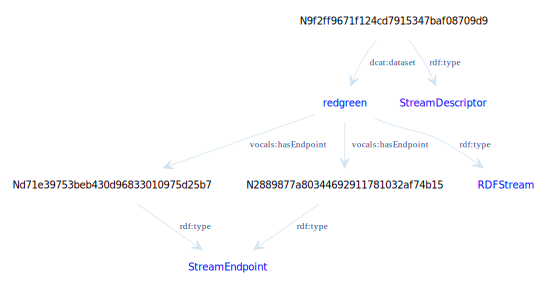

In [17]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png

data, metadata = draw_graph(redgreen_stream.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [12]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [19]:
endpoint = redgreen_stream.endpoints()[0]


In [20]:
resp = endpoint.call()

In [21]:
resp

In [22]:
df = resp.flatten()
df = df.dataframe(['results_bindings_0_cntg_value', 'results_bindings_0_cntr_value'])
df

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntg_datatype,results_bindings_0_cntg_type,results_bindings_0_cntg_value,results_bindings_0_cntr_datatype,results_bindings_0_cntr_type,results_bindings_0_cntr_value,results_bindings_0_moreRedsThanGreens_datatype,results_bindings_0_moreRedsThanGreens_type,results_bindings_0_moreRedsThanGreens_value
0,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,8,http://www.w3.org/2001/XMLSchema#integer,literal,2,http://www.w3.org/2001/XMLSchema#boolean,literal,false
1,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,7,http://www.w3.org/2001/XMLSchema#integer,literal,2,http://www.w3.org/2001/XMLSchema#boolean,literal,false
2,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,7,http://www.w3.org/2001/XMLSchema#integer,literal,2,http://www.w3.org/2001/XMLSchema#boolean,literal,false
3,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,5,http://www.w3.org/2001/XMLSchema#integer,literal,2,http://www.w3.org/2001/XMLSchema#boolean,literal,false
4,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#integer,literal,2,http://www.w3.org/2001/XMLSchema#boolean,literal,false


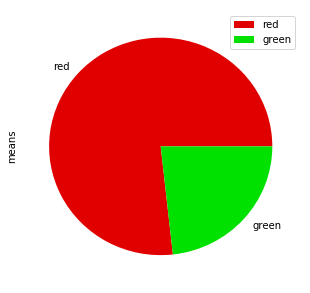

In [23]:
%matplotlib inline
import pandas as pd

df1 = df[['results_bindings_0_cntg_value','results_bindings_0_cntr_value']]
cntg_mean = df1['results_bindings_0_cntg_value'].mean()
cntr_mean = df1['results_bindings_0_cntr_value'].mean()

df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['red', 'green'])
plot = df.plot.pie(y='means', colors=["#e10000", "#00e100"], figsize=(5, 5))

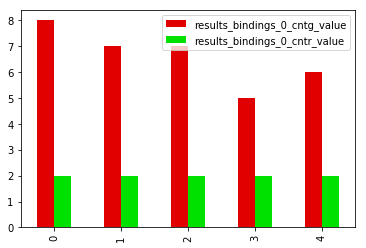

In [27]:
df1.plot.bar(color=["#e10000", "#00e100"])